In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime

In [65]:
data = pd.read_csv("C:/Users/customer/Desktop/개인 프로젝트/펀드 가격 예측/KB스타코리아인덱스증권투자신탁(주식-파생형)A_가격자료.csv",index_col=0,thousands = ',')
data.head()

,기준가,전일대비,등락율(%),설정액(억),순 자산액(억),과표기준가,현재가,대비,등락률,거래량,거래대금,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
날짜,,,,,,,,,,,,,,,,,,,,
2020.02.17,1167.73,8.60,0.74,152.0,177.0,1031.41,2242.17,-1.42,-0.06,458247.0,5639200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.02.14,1159.13,2.15,-0.19,153.0,177.0,1031.53,2243.59,10.63,0.48,597224.0,6379565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.02.13,1161.28,8.47,0.73,156.0,181.0,1031.54,2232.96,-5.42,-0.24,638666.0,8121197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.02.12,1152.81,12.17,1.07,159.0,184.0,1031.56,2238.38,15.26,0.69,632462.0,6892197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020.02.11,1140.64,7.94,-0.69,159.0,181.0,1031.56,2223.12,22.05,1.00,526211.0,6611195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
column_name = ['기준가','전일대비','등락율(%)','설정액(억)','순 자산액(억)','과표기준가','현재가','대비','등락률','거래량','거래대금']
data = data[column_name]
data = data.dropna(how = 'all')
print(data)

                기준가    전일대비  등락율(%)  설정액(억)  순 자산액(억)    과표기준가      현재가  \
날짜                                                                        
2020.02.17  1167.73    8.60    0.74   152.0     177.0  1031.41  2242.17   
2020.02.14  1159.13    2.15   -0.19   153.0     177.0  1031.53  2243.59   
2020.02.13  1161.28    8.47    0.73   156.0     181.0  1031.54  2232.96   
2020.02.12  1152.81   12.17    1.07   159.0     184.0  1031.56  2238.38   
2020.02.11  1140.64    7.94   -0.69   159.0     181.0  1031.56  2223.12   
...             ...     ...     ...     ...       ...      ...      ...   
2016.01.08   878.45   10.04   -1.13   559.0     491.0  1018.40  1906.60   
2016.01.07   888.49    5.43   -0.61   556.0     494.0  1018.41  1924.82   
2016.01.06   893.92    5.56    0.63   553.0     495.0  1018.43  1912.06   
2016.01.05   888.36   21.64   -2.38   551.0     490.0  1018.45  1906.94   
2016.01.04   910.00    0.06   -0.01   551.0     502.0  1018.46  1897.87   

               대비   등락률 

In [46]:
data_x = data[['전일대비','등락율(%)','설정액(억)','순 자산액(억)','과표기준가','현재가','대비','등락률','거래량','거래대금']]
data_y = data['기준가']


              전일대비  등락율(%)  설정액(억)  순 자산액(억)     과표기준가       현재가     대비   등락률  \
날짜                                                                              
2020.02.17    8.60    0.74   152.0     177.0  1,031.41  2,242.17  -1.42 -0.06   
2020.02.14    2.15   -0.19   153.0     177.0  1,031.53  2,243.59  10.63  0.48   
2020.02.13    8.47    0.73   156.0     181.0  1,031.54  2,232.96  -5.42 -0.24   
2020.02.12   12.17    1.07   159.0     184.0  1,031.56  2,238.38  15.26  0.69   
2020.02.11    7.94   -0.69   159.0     181.0  1,031.56  2,223.12  22.05  1.00   
...            ...     ...     ...       ...       ...       ...    ...   ...   
2016.01.08   10.04   -1.13   559.0     491.0  1,018.40  1,906.60 -18.22 -0.95   
2016.01.07    5.43   -0.61   556.0     494.0  1,018.41  1,924.82  12.76  0.67   
2016.01.06    5.56    0.63   553.0     495.0  1,018.43  1,912.06   5.12  0.27   
2016.01.05   21.64   -2.38   551.0     490.0  1,018.45  1,906.94   9.07  0.48   
2016.01.04    0.06   -0.01  

In [49]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size= 0.1)
print(x_train)

              전일대비  등락율(%)  설정액(억)  순 자산액(억)     과표기준가       현재가     대비   등락률  \
날짜                                                                              
2016.08.10    6.81    0.71   456.0     441.0  1,016.80  2,042.16 -14.08 -0.68   
2017.04.26   13.69    1.27   215.0     234.0  1,030.70  2,173.74   8.70  0.40   
2019.02.01    3.02   -0.28   165.0     178.0  1,015.11  2,203.46  -1.39 -0.06   
2018.07.11    3.81    0.34   160.0     180.0  1,016.37  2,294.16   8.36  0.37   
2016.11.07    1.49   -0.16   384.0     364.0  1,015.38  1,979.65  12.12  0.62   
...            ...     ...     ...       ...       ...       ...    ...   ...   
2017.08.23    4.97    0.42   145.0     173.0  1,030.25  2,355.00  -3.37 -0.14   
2019.03.21    0.47    0.04   163.0     172.0  1,013.99  2,184.88   7.78  0.36   
2017.09.20    2.24   -0.19   150.0     179.0    999.49  2,418.21  32.14  1.35   
2017.03.03   10.49    1.02   265.0     275.0  1,030.66  2,133.00  -0.78 -0.04   
2019.04.18    0.89   -0.08  

In [50]:
sc = MinMaxScaler()
x_train_sc = sc.fit_transform(x_train)
print(x_train_sc)

ValueError: could not convert string to float: '1,016.80'

In [ ]:
seq_len = 50
sequence_length = seq_len + 1
result = []
for index in range(len(data)- sequence_length):
    result.append(data[index:index+sequence_length])

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((p / window[0])-1)for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)
print(result[0:3])

KeyError: 0

In [6]:
col_dic = {}
for i, column in enumerate(data.columns):
    col_dic[column] = i
print(col_dic)


{'기준가': 0, '전일대비': 1, '등락율(%)': 2, '설정액(억)': 3, '순 자산액(억)': 4, '과표기준가': 5, '현재가': 6, '대비': 7, '등락률': 8, '거래량': 9, '거래대금': 10}


In [82]:
normalized_data = []
for window in result:
    normalized_window = [((p/window[0])-1)for p in window]
    normalized_data.append(normalized_window)
    
print(normalized_data)

KeyError: 0

In [40]:
result = np.array(normalized_data)

In [41]:
# split train and test data
row = int(round(result.shape[0]*0.9))
train = result[:row,:]
np.random.shuffle(train)


In [42]:
x_train = train[:,:-1]
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
y_train = train[:, -1]

In [43]:
x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]


In [44]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((848, 50, 1), (94, 50, 1), (848,), (94,))

In [45]:
#Build a model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (50,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mse', optimizer = 'rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x_train, y_train,
          validation_data = (x_test,y_test),
          batch_size = 10,
          epochs = 20)

Train on 848 samples, validate on 94 samples
Epoch 1/20
848/848 [==============================] - 22s 25ms/step - loss: 6.5520e-04 - val_loss: 1.8925e-04
Epoch 2/20
848/848 [==============================] - 25s 30ms/step - loss: 2.5761e-04 - val_loss: 1.4826e-04
Epoch 3/20
848/848 [==============================] - 15s 18ms/step - loss: 2.2531e-04 - val_loss: 1.3598e-04
Epoch 4/20
848/848 [==============================] - 15s 18ms/step - loss: 1.7396e-04 - val_loss: 1.3155e-04
Epoch 5/20
848/848 [==============================] - 25s 30ms/step - loss: 1.4992e-04 - val_loss: 7.5141e-05
Epoch 6/20
848/848 [==============================] - 16s 19ms/step - loss: 1.2359e-04 - val_loss: 7.6705e-05
Epoch 7/20
848/848 [==============================] - 16s 19ms/step - loss: 1.1648e-04 - val_loss: 6.9032e-05
Epoch 8/20
848/848 [==============================] - 16s 19ms/step - loss: 1.0387e-04 - val_loss: 6.6591e-05
Epoch 9/20
848/848 [==============================] - 16s 18ms/step - loss:

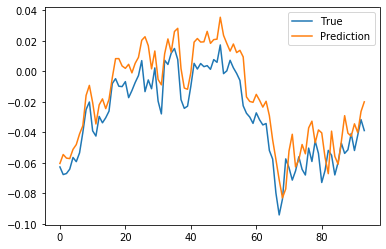

In [47]:
pred = model.predict(x_test)

flg = plt.figure(facecolor = 'white')
ax = flg.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label = 'Prediction')
ax.legend()
plt.show()